## This is a simple workflow with graph

In [58]:
def function3(input3):
    return input3

In [59]:
def function1(input1):
    return input1 + " from first function"

def function2(input2):
    output = function3(" this is function 3 in between")
    return input2 + output + " from second function"

In [60]:
from langgraph.graph import Graph

In [61]:
workflow = Graph()

In [62]:
workflow.add_node("function1", function1)


In [63]:
workflow.add_node("function2", function2)

In [64]:
workflow.add_edge("function1", "function2")

In [65]:
workflow.set_entry_point("function1")

In [66]:
workflow.set_finish_point("function2")

In [67]:
app1 = workflow.compile()

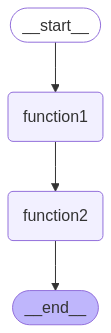

In [68]:
from IPython.display import Image, display
try:
    display(Image(app1.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [69]:
app1.invoke("Hi there!")

'Hi there! from first function this is function 3 in between from second function'

In [70]:
input = "Hi There. How are you doing?"

In [71]:
for output in app1.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_"*100)
        print(value)
        print("\n")

here is output from function1
____________________________________________________________________________________________________
Hi There. How are you doing? from first function


here is output from function2
____________________________________________________________________________________________________
Hi There. How are you doing? from first function this is function 3 in between from second function




### Creating a workflow with LLM

In [72]:
from dotenv import load_dotenv
load_dotenv()
import os
GROQ_API_KEY = os.getenv("GROQ_API_KEY")
if GROQ_API_KEY:
    print("Groq API Key retrieved successfully.")

Groq API Key retrieved successfully.


In [74]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="llama-3.3-70b-versatile")
llm.invoke("Hi there!").content

"It's nice to meet you. Is there something I can help you with or would you like to chat?"

In [75]:
def function4(input):
    llm = ChatGroq(model="llama-3.3-70b-versatile")
    output = llm.invoke(input).content
    return output + " from first function"

In [76]:
def function5(input):
    upper_case=input.upper()
    return upper_case + " from second function"

In [ ]:
from langgraph.graph import Graph
workflow2 = Graph()
workflow2.add_node("LLM Response", function4)
workflow2.add_node("Upper Case",function5)
workflow2.add_node("Token Counter",function6)
workflow2.add_edge("LLM Response","Upper Case")
workflow2.set_entry_point("LLM Response")
workflow2.set_finish_point("Upper Case")
app2 = workflow2.compile()

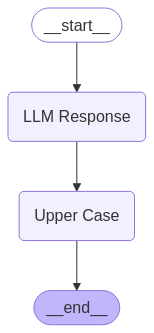

In [78]:
from IPython.display import Image, display
try:
    display(Image(app2.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [80]:
print(app2.invoke("What is AI?"))

**ARTIFICIAL INTELLIGENCE (AI)** IS A FIELD OF COMPUTER SCIENCE THAT FOCUSES ON CREATING INTELLIGENT MACHINES CAPABLE OF PERFORMING TASKS THAT TYPICALLY REQUIRE HUMAN INTELLIGENCE. THESE TASKS INCLUDE:

1. **LEARNING**: AI SYSTEMS CAN LEARN FROM DATA, EXPERIENCES, OR INTERACTIONS, AND IMPROVE THEIR PERFORMANCE OVER TIME.
2. **REASONING**: AI SYSTEMS CAN DRAW INFERENCES, MAKE DECISIONS, AND SOLVE PROBLEMS USING LOGICAL RULES AND ALGORITHMS.
3. **PERCEPTION**: AI SYSTEMS CAN INTERPRET AND UNDERSTAND DATA FROM SENSORS, SUCH AS IMAGES, SPEECH, OR TEXT.
4. **NATURAL LANGUAGE PROCESSING (NLP)**: AI SYSTEMS CAN UNDERSTAND, GENERATE, AND PROCESS HUMAN LANGUAGE.

AI SYSTEMS CAN BE CATEGORIZED INTO DIFFERENT TYPES, INCLUDING:

1. **NARROW OR WEAK AI**: DESIGNED TO PERFORM A SPECIFIC TASK, SUCH AS IMAGE RECOGNITION, LANGUAGE TRANSLATION, OR GAME PLAYING.
2. **GENERAL OR STRONG AI**: A HYPOTHETICAL AI SYSTEM THAT POSSESSES HUMAN-LIKE INTELLIGENCE, REASONING, AND DECISION-MAKING CAPABILITIES.
3. **

**ARTIFICIAL INTELLIGENCE (AI)** IS A FIELD OF COMPUTER SCIENCE THAT FOCUSES ON CREATING INTELLIGENT MACHINES CAPABLE OF PERFORMING TASKS THAT TYPICALLY REQUIRE HUMAN INTELLIGENCE. THESE TASKS INCLUDE:

1. **LEARNING**: AI SYSTEMS CAN LEARN FROM DATA, EXPERIENCES, OR INTERACTIONS, AND IMPROVE THEIR PERFORMANCE OVER TIME.
2. **REASONING**: AI SYSTEMS CAN DRAW INFERENCES, MAKE DECISIONS, AND SOLVE PROBLEMS USING LOGICAL RULES AND ALGORITHMS.
3. **PERCEPTION**: AI SYSTEMS CAN INTERPRET AND UNDERSTAND DATA FROM SENSORS, SUCH AS IMAGES, SPEECH, OR TEXT.
4. **NATURAL LANGUAGE PROCESSING (NLP)**: AI SYSTEMS CAN UNDERSTAND, GENERATE, AND PROCESS HUMAN LANGUAGE.

AI SYSTEMS CAN BE CATEGORIZED INTO DIFFERENT TYPES, INCLUDING:

1. **NARROW OR WEAK AI**: DESIGNED TO PERFORM A SPECIFIC TASK, SUCH AS IMAGE RECOGNITION, LANGUAGE TRANSLATION, OR GAME PLAYING.
2. **GENERAL OR STRONG AI**: A HYPOTHETICAL AI SYSTEM THAT POSSESSES HUMAN-LIKE INTELLIGENCE, REASONING, AND DECISION-MAKING CAPABILITIES.
3. **SUPERINTELLIGENCE**: A HIGHLY ADVANCED AI SYSTEM THAT SIGNIFICANTLY SURPASSES HUMAN INTELLIGENCE AND CAPABILITIES.

AI HAS NUMEROUS APPLICATIONS ACROSS VARIOUS INDUSTRIES, INCLUDING:

1. **HEALTHCARE**: MEDICAL DIAGNOSIS, PERSONALIZED MEDICINE, AND PATIENT CARE.
2. **FINANCE**: TRADING, RISK MANAGEMENT, AND CUSTOMER SERVICE.
3. **TRANSPORTATION**: AUTONOMOUS VEHICLES, ROUTE OPTIMIZATION, AND TRAFFIC MANAGEMENT.
4. **EDUCATION**: ADAPTIVE LEARNING, INTELLIGENT TUTORING, AND STUDENT ASSESSMENT.

THE BENEFITS OF AI INCLUDE:

1. **IMPROVED EFFICIENCY**: AUTOMATION OF REPETITIVE AND MUNDANE TASKS.
2. **ENHANCED DECISION-MAKING**: DATA-DRIVEN INSIGHTS AND PREDICTIVE ANALYTICS.
3. **INCREASED ACCURACY**: REDUCED ERRORS AND IMPROVED PRECISION.
4. **PERSONALIZATION**: TAILORED EXPERIENCES AND RECOMMENDATIONS.

HOWEVER, AI ALSO RAISES CONCERNS ABOUT:

1. **JOB DISPLACEMENT**: AUTOMATION OF JOBS AND POTENTIAL UNEMPLOYMENT.
2. **BIAS AND FAIRNESS**: POTENTIAL BIASES IN AI DECISION-MAKING AND OUTCOMES.
3. **SECURITY AND PRIVACY**: RISKS OF DATA BREACHES AND UNAUTHORIZED ACCESS.
4. **ETHICS AND ACCOUNTABILITY**: ENSURING AI SYSTEMS ARE TRANSPARENT, EXPLAINABLE, AND ACCOUNTABLE.

AS AI CONTINUES TO EVOLVE AND IMPROVE, IT'S ESSENTIAL TO ADDRESS THESE CHALLENGES AND ENSURE THAT AI IS DEVELOPED AND USED RESPONSIBLY, FOR THE BENEFIT OF HUMANITY. FROM FIRST FUNCTION from second function

In [81]:
for output in app2.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_"*100)
        print(value)
        print("\n")

here is output from LLM Response
____________________________________________________________________________________________________
I'm doing well, thanks for asking. I'm a large language model, so I don't have emotions or feelings like humans do, but I'm functioning properly and ready to help with any questions or topics you'd like to discuss. How about you? How's your day going so far? from first function


here is output from Upper Case
____________________________________________________________________________________________________
I'M DOING WELL, THANKS FOR ASKING. I'M A LARGE LANGUAGE MODEL, SO I DON'T HAVE EMOTIONS OR FEELINGS LIKE HUMANS DO, BUT I'M FUNCTIONING PROPERLY AND READY TO HELP WITH ANY QUESTIONS OR TOPICS YOU'D LIKE TO DISCUSS. HOW ABOUT YOU? HOW'S YOUR DAY GOING SO FAR? FROM FIRST FUNCTION from second function




### Creating our own Token Counter

In [90]:
def function6(input):
    print(input)
    tokens = input.split(" ")
    total_tokens = len(tokens)
    return f"{total_tokens} is Total Tokens . Also from Token Counter"

In [91]:
from langgraph.graph import Graph
workflow3 = Graph()
workflow3.add_node("LLM Response", function4)
workflow3.add_node("Upper Case",function5)
workflow3.add_node("Token Counter",function6)
workflow3.add_edge("LLM Response","Upper Case")
workflow3.add_edge("Upper Case","Token Counter")
workflow3.set_entry_point("LLM Response")
workflow3.set_finish_point("Token Counter")
app3 = workflow3.compile()

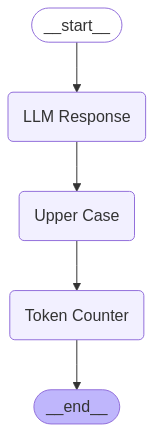

In [92]:
from IPython.display import Image, display
try:
    display(Image(app3.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [93]:
print(app3.invoke("What is AI?"))

**ARTIFICIAL INTELLIGENCE (AI)** IS A FIELD OF COMPUTER SCIENCE THAT FOCUSES ON CREATING INTELLIGENT MACHINES CAPABLE OF PERFORMING TASKS THAT TYPICALLY REQUIRE HUMAN INTELLIGENCE, SUCH AS:

* LEARNING
* PROBLEM-SOLVING
* REASONING
* PERCEPTION
* UNDERSTANDING LANGUAGE

AI SYSTEMS USE ALGORITHMS AND DATA TO MAKE DECISIONS, CLASSIFY OBJECTS, AND GENERATE INSIGHTS. THE GOAL OF AI IS TO CREATE MACHINES THAT CAN THINK AND ACT LIKE HUMANS, OR EVEN SURPASS HUMAN CAPABILITIES IN CERTAIN AREAS.

**TYPES OF AI:**

1. **NARROW OR WEAK AI**: DESIGNED TO PERFORM A SPECIFIC TASK, SUCH AS FACIAL RECOGNITION, LANGUAGE TRANSLATION, OR PLAYING CHESS.
2. **GENERAL OR STRONG AI**: A HYPOTHETICAL AI SYSTEM THAT POSSESSES HUMAN-LIKE INTELLIGENCE AND CAN PERFORM ANY INTELLECTUAL TASK.
3. **SUPERINTELLIGENCE**: AN AI SYSTEM THAT SIGNIFICANTLY SURPASSES HUMAN INTELLIGENCE AND CAPABILITIES.

**AI APPLICATIONS:**

1. VIRTUAL ASSISTANTS (E.G., SIRI, ALEXA)
2. IMAGE AND SPEECH RECOGNITION
3. NATURAL LANGUAGE PROC

In [ ]:
input = "What is AI?"
for output in app3.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_"*100)
        print(value)
        print("\n")

here is output from LLM Response
____________________________________________________________________________________________________
**Artificial Intelligence (AI)** is a field of computer science that focuses on creating intelligent machines that can think, learn, and act like humans. AI involves the development of algorithms, statistical models, and computer programs that enable machines to perform tasks that typically require human intelligence, such as:

1. **Reasoning**: Drawing inferences, making decisions, and solving problems.
2. **Learning**: Adapting to new data, identifying patterns, and improving performance over time.
3. **Problem-solving**: Finding solutions to complex problems, often through trial and error.
4. **Perception**: Interpreting and understanding data from sensors, such as images, speech, and text.
5. **Natural Language Processing (NLP)**: Understanding, generating, and processing human language.

AI can be categorized into several types, including:

1. **Narrow or Weak AI**: Designed to perform a specific task, such as facial recognition, language translation, or playing chess.
2. **General or Strong AI**: A hypothetical AI system that possesses human-like intelligence, reasoning, and problem-solving abilities.
3. **Superintelligence**: An AI system that significantly surpasses human intelligence, potentially leading to significant societal implications.

AI has numerous applications across various industries, including:

1. **Healthcare**: Medical diagnosis, personalized medicine, and patient care.
2. **Finance**: Risk analysis, portfolio management, and trading.
3. **Transportation**: Autonomous vehicles, route optimization, and traffic management.
4. **Customer Service**: Chatbots, virtual assistants, and sentiment analysis.
5. **Cybersecurity**: Threat detection, incident response, and security analytics.

The benefits of AI include:

1. **Improved Efficiency**: Automating tasks, reducing manual labor, and increasing productivity.
2. **Enhanced Decision-Making**: Providing data-driven insights, predictive analytics, and recommendations.
3. **Personalization**: Offering tailored experiences, recommendations, and services.
4. **Innovation**: Enabling new products, services, and business models.

However, AI also raises concerns about:

1. **Job Displacement**: Replacing human workers with automated systems.
2. **Bias and Fairness**: Ensuring AI systems are fair, transparent, and unbiased.
3. **Security and Privacy**: Protecting sensitive data and preventing AI-powered cyber threats.
4. **Accountability**: Establishing responsibility and accountability for AI-driven decisions and actions.

As AI continues to evolve and improve, it's essential to address these challenges and ensure that AI development is aligned with human values, ethics, and societal needs. from first function


here is output from Upper Case
____________________________________________________________________________________________________
**ARTIFICIAL INTELLIGENCE (AI)** IS A FIELD OF COMPUTER SCIENCE THAT FOCUSES ON CREATING INTELLIGENT MACHINES THAT CAN THINK, LEARN, AND ACT LIKE HUMANS. AI INVOLVES THE DEVELOPMENT OF ALGORITHMS, STATISTICAL MODELS, AND COMPUTER PROGRAMS THAT ENABLE MACHINES TO PERFORM TASKS THAT TYPICALLY REQUIRE HUMAN INTELLIGENCE, SUCH AS:

1. **REASONING**: DRAWING INFERENCES, MAKING DECISIONS, AND SOLVING PROBLEMS.
2. **LEARNING**: ADAPTING TO NEW DATA, IDENTIFYING PATTERNS, AND IMPROVING PERFORMANCE OVER TIME.
3. **PROBLEM-SOLVING**: FINDING SOLUTIONS TO COMPLEX PROBLEMS, OFTEN THROUGH TRIAL AND ERROR.
4. **PERCEPTION**: INTERPRETING AND UNDERSTANDING DATA FROM SENSORS, SUCH AS IMAGES, SPEECH, AND TEXT.
5. **NATURAL LANGUAGE PROCESSING (NLP)**: UNDERSTANDING, GENERATING, AND PROCESSING HUMAN LANGUAGE.

AI CAN BE CATEGORIZED INTO SEVERAL TYPES, INCLUDING:

1. **NARROW OR WEAK AI**: DESIGNED TO PERFORM A SPECIFIC TASK, SUCH AS FACIAL RECOGNITION, LANGUAGE TRANSLATION, OR PLAYING CHESS.
2. **GENERAL OR STRONG AI**: A HYPOTHETICAL AI SYSTEM THAT POSSESSES HUMAN-LIKE INTELLIGENCE, REASONING, AND PROBLEM-SOLVING ABILITIES.
3. **SUPERINTELLIGENCE**: AN AI SYSTEM THAT SIGNIFICANTLY SURPASSES HUMAN INTELLIGENCE, POTENTIALLY LEADING TO SIGNIFICANT SOCIETAL IMPLICATIONS.

AI HAS NUMEROUS APPLICATIONS ACROSS VARIOUS INDUSTRIES, INCLUDING:

1. **HEALTHCARE**: MEDICAL DIAGNOSIS, PERSONALIZED MEDICINE, AND PATIENT CARE.
2. **FINANCE**: RISK ANALYSIS, PORTFOLIO MANAGEMENT, AND TRADING.
3. **TRANSPORTATION**: AUTONOMOUS VEHICLES, ROUTE OPTIMIZATION, AND TRAFFIC MANAGEMENT.
4. **CUSTOMER SERVICE**: CHATBOTS, VIRTUAL ASSISTANTS, AND SENTIMENT ANALYSIS.
5. **CYBERSECURITY**: THREAT DETECTION, INCIDENT RESPONSE, AND SECURITY ANALYTICS.

THE BENEFITS OF AI INCLUDE:

1. **IMPROVED EFFICIENCY**: AUTOMATING TASKS, REDUCING MANUAL LABOR, AND INCREASING PRODUCTIVITY.
2. **ENHANCED DECISION-MAKING**: PROVIDING DATA-DRIVEN INSIGHTS, PREDICTIVE ANALYTICS, AND RECOMMENDATIONS.
3. **PERSONALIZATION**: OFFERING TAILORED EXPERIENCES, RECOMMENDATIONS, AND SERVICES.
4. **INNOVATION**: ENABLING NEW PRODUCTS, SERVICES, AND BUSINESS MODELS.

HOWEVER, AI ALSO RAISES CONCERNS ABOUT:

1. **JOB DISPLACEMENT**: REPLACING HUMAN WORKERS WITH AUTOMATED SYSTEMS.
2. **BIAS AND FAIRNESS**: ENSURING AI SYSTEMS ARE FAIR, TRANSPARENT, AND UNBIASED.
3. **SECURITY AND PRIVACY**: PROTECTING SENSITIVE DATA AND PREVENTING AI-POWERED CYBER THREATS.
4. **ACCOUNTABILITY**: ESTABLISHING RESPONSIBILITY AND ACCOUNTABILITY FOR AI-DRIVEN DECISIONS AND ACTIONS.

AS AI CONTINUES TO EVOLVE AND IMPROVE, IT'S ESSENTIAL TO ADDRESS THESE CHALLENGES AND ENSURE THAT AI DEVELOPMENT IS ALIGNED WITH HUMAN VALUES, ETHICS, AND SOCIETAL NEEDS. FROM FIRST FUNCTION from second function


**ARTIFICIAL INTELLIGENCE (AI)** IS A FIELD OF COMPUTER SCIENCE THAT FOCUSES ON CREATING INTELLIGENT MACHINES THAT CAN THINK, LEARN, AND ACT LIKE HUMANS. AI INVOLVES THE DEVELOPMENT OF ALGORITHMS, STATISTICAL MODELS, AND COMPUTER PROGRAMS THAT ENABLE MACHINES TO PERFORM TASKS THAT TYPICALLY REQUIRE HUMAN INTELLIGENCE, SUCH AS:

1. **REASONING**: DRAWING INFERENCES, MAKING DECISIONS, AND SOLVING PROBLEMS.
2. **LEARNING**: ADAPTING TO NEW DATA, IDENTIFYING PATTERNS, AND IMPROVING PERFORMANCE OVER TIME.
3. **PROBLEM-SOLVING**: FINDING SOLUTIONS TO COMPLEX PROBLEMS, OFTEN THROUGH TRIAL AND ERROR.
4. **PERCEPTION**: INTERPRETING AND UNDERSTANDING DATA FROM SENSORS, SUCH AS IMAGES, SPEECH, AND TEXT.
5. **NATURAL LANGUAGE PROCESSING (NLP)**: UNDERSTANDING, GENERATING, AND PROCESSING HUMAN LANGUAGE.

AI CAN BE CATEGORIZED INTO SEVERAL TYPES, INCLUDING:

1. **NARROW OR WEAK AI**: DESIGNED TO PERFORM A SPECIFIC TASK, SUCH AS FACIAL RECOGNITION, LANGUAGE TRANSLATION, OR PLAYING CHESS.
2. **GENERAL OR STRONG AI**: A HYPOTHETICAL AI SYSTEM THAT POSSESSES HUMAN-LIKE INTELLIGENCE, REASONING, AND PROBLEM-SOLVING ABILITIES.
3. **SUPERINTELLIGENCE**: AN AI SYSTEM THAT SIGNIFICANTLY SURPASSES HUMAN INTELLIGENCE, POTENTIALLY LEADING TO SIGNIFICANT SOCIETAL IMPLICATIONS.

AI HAS NUMEROUS APPLICATIONS ACROSS VARIOUS INDUSTRIES, INCLUDING:

1. **HEALTHCARE**: MEDICAL DIAGNOSIS, PERSONALIZED MEDICINE, AND PATIENT CARE.
2. **FINANCE**: RISK ANALYSIS, PORTFOLIO MANAGEMENT, AND TRADING.
3. **TRANSPORTATION**: AUTONOMOUS VEHICLES, ROUTE OPTIMIZATION, AND TRAFFIC MANAGEMENT.
4. **CUSTOMER SERVICE**: CHATBOTS, VIRTUAL ASSISTANTS, AND SENTIMENT ANALYSIS.
5. **CYBERSECURITY**: THREAT DETECTION, INCIDENT RESPONSE, AND SECURITY ANALYTICS.

THE BENEFITS OF AI INCLUDE:

1. **IMPROVED EFFICIENCY**: AUTOMATING TASKS, REDUCING MANUAL LABOR, AND INCREASING PRODUCTIVITY.
2. **ENHANCED DECISION-MAKING**: PROVIDING DATA-DRIVEN INSIGHTS, PREDICTIVE ANALYTICS, AND RECOMMENDATIONS.
3. **PERSONALIZATION**: OFFERING TAILORED EXPERIENCES, RECOMMENDATIONS, AND SERVICES.
4. **INNOVATION**: ENABLING NEW PRODUCTS, SERVICES, AND BUSINESS MODELS.

HOWEVER, AI ALSO RAISES CONCERNS ABOUT:

1. **JOB DISPLACEMENT**: REPLACING HUMAN WORKERS WITH AUTOMATED SYSTEMS.
2. **BIAS AND FAIRNESS**: ENSURING AI SYSTEMS ARE FAIR, TRANSPARENT, AND UNBIASED.
3. **SECURITY AND PRIVACY**: PROTECTING SENSITIVE DATA AND PREVENTING AI-POWERED CYBER THREATS.
4. **ACCOUNTABILITY**: ESTABLISHING RESPONSIBILITY AND ACCOUNTABILITY FOR AI-DRIVEN DECISIONS AND ACTIONS.

AS AI CONTINUES TO EVOLVE AND IMPROVE, IT'S ESSENTIAL TO ADDRESS THESE CHALLENGES AND ENSURE THAT AI DEVELOPMENT IS ALIGNED WITH HUMAN VALUES, ETHICS, AND SOCIETAL NEEDS. FROM FIRST FUNCTION from second function
here is output from Token Counter
____________________________________________________________________________________________________
319 is Total Tokens . Also from Token Counter


